<a href="https://colab.research.google.com/github/sunneysood/deeplearning/blob/master/suny_sn1_gmail_com_Assignment_15_CNN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Credits: https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py


from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

Using TensorFlow backend.


11493376/11490434 [==============================] - 1s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [0]:
#https://github.com/sunneysood/Tensorflow/blob/master/Multi_Layer_LSTM.ipynb
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

## CNN with 3*3 Kernel wth 3 conv layers with maxpooling , drop out and batch normalisation 

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 6, 6, 128)         73856     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 2, 2, 128)        

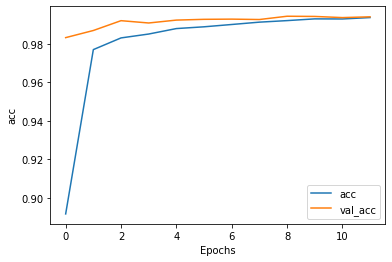

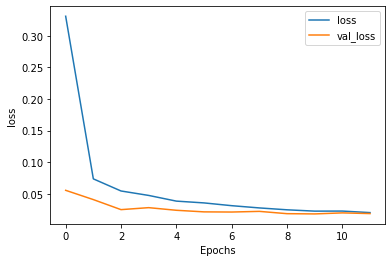

Test loss: 0.018668196208900555
Test accuracy: 0.994


In [9]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.summary()

model_run = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))


plot_graphs(model_run, 'acc')
plot_graphs(model_run, 'loss')

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [0]:
#model_run.history['val_loss']

## CNN with 5*5 Kernel wth 12 conv layers with maxpooling and drop out 

In [3]:
from keras.layers.normalization import BatchNormalization

model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=input_shape,padding='same'))
model.add(Conv2D(16, (5, 5), activation='relu',padding='same'))
#model.add(MaxPooling2D(pool_size=(5, 5),strides=(1,1),padding='same'))
model.add(Dropout(0.25))

model.add(Conv2D(32, (5, 5), activation='relu',padding='same'))
#model.add(MaxPooling2D(pool_size=(5, 5),padding='same'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

#model.add(Conv2D(256, (5, 5), activation='relu',padding='same'))
#model.add(MaxPooling2D(pool_size=(5, 5)))
#model.add(Dropout(0.25))

#model.add(Conv2D(512, (5, 5), activation='relu',padding='same'))
#model.add(Dropout(0.25))
#model.add(BatchNormalization())

#model.add(Conv2D(512, (5, 5), activation='relu',padding='same'))
#model.add(MaxPooling2D(pool_size=(5, 5),padding='same'))

#model.add(Conv2D(512, (5, 5), activation='relu',padding='same'))
#model.add(MaxPooling2D(pool_size=(5, 5),padding='same'))

model.add(Conv2D(16, (5, 5), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(5, 5),padding='same'))
model.add(Dropout(0.25))

model.add(Conv2D(32, (5, 5), activation='relu',padding='same'))
#model.add(Conv2D(128, (5, 5), activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
#model.add(Conv2D(64, (5, 5), activation='relu',padding='same'))
#model.add(Conv2D(64, (5, 5), activation='relu',padding='same'))

model.add(Flatten())
model.add(Dense(32, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.summary()







Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.










Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 16)        12816     
_________________________________________________________________
dropout_1 (Dropout)          (None, 28, 28, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 32)        12832     
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
dropout_2 (Dropout)          (None, 28, 28, 32)        0 

In [4]:
model_run = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 13s 212us/step - loss: 0.2938 - acc: 0.9047 - val_loss: 0.0488 - val_acc: 0.9845
Epoch 2/12
60000/60000 [==============================] - 6s 97us/step - loss: 0.0807 - acc: 0.9753 - val_loss: 0.0447 - val_acc: 0.9857
Epoch 3/12
60000/60000 [==============================] - 6s 98us/step - loss: 0.0600 - acc: 0.9817 - val_loss: 0.0337 - val_acc: 0.9895
Epoch 4/12
60000/60000 [==============================] - 6s 98us/step - loss: 0.0478 - acc: 0.9853 - val_loss: 0.0365 - val_acc: 0.9877
Epoch 5/12
60000/60000 [==============================] - 6s 99us/step - loss: 0.0406 - acc: 0.9869 - val_loss: 0.0198 - val_acc: 0.9927
Epoch 6/12
60000/60000 [==============================] - 6s 98us/step - loss: 0.0367 - acc: 0.9887 - val_loss: 0.0230 - val_acc: 0.9920
Epoch 7/12
60000/60000 [======

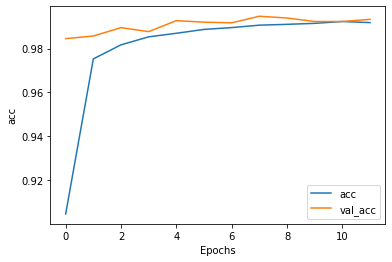

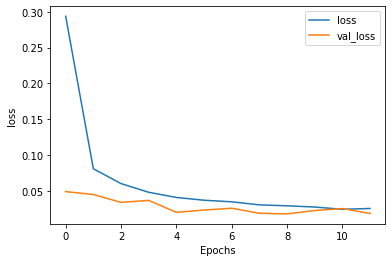

Test loss: 0.018208784474545246
Test accuracy: 0.9933


In [5]:
plot_graphs(model_run, 'acc')
plot_graphs(model_run, 'loss')

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

## CNN with 9*9 Kernel wth 15 conv layers with maxpooling and drop out 

In [8]:
from keras.layers.normalization import BatchNormalization
model = Sequential()
model.add(Conv2D(32, kernel_size=(7, 7),
                 activation='relu',
                 input_shape=input_shape,padding='same'))
model.add(Conv2D(32, (7, 7), activation='relu',padding='same'))
#model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Dropout(0.25))

model.add(Conv2D(16, (7, 7), activation='relu',padding='same'))
#model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
#model.add(Dropout(0.25))
model.add(BatchNormalization())

model.add(Conv2D(32, (7, 7), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
#model.add(Dropout(0.25))

model.add(Conv2D(32, (7, 7), activation='relu',padding='same'))
#model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Dropout(0.25))

model.add(Conv2D(64, (7, 7), activation='relu',padding='same'))
#model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Dropout(0.25))
model.add(BatchNormalization())

model.add(Conv2D(16, (7, 7), activation='relu',padding='same'))
#model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
#model.add(Dropout(0.25))

#model.add(Conv2D(128, (9, 9), activation='relu',padding='same'))
#model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
#model.add(Dropout(0.25))

#model.add(Conv2D(64, (9, 9), activation='relu',padding='same'))
#model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
#model.add(Dropout(0.25))
#model.add(BatchNormalization())

#model.add(Conv2D(64, (9, 9), activation='relu',padding='same'))
#model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
#model.add(Dropout(0.25))

model.add(Conv2D(32, (7, 7), activation='relu',padding='same'))
#model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(32, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))


model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 28, 28, 32)        1600      
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 28, 28, 32)        50208     
_________________________________________________________________
dropout_10 (Dropout)         (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 28, 28, 16)        25104     
_________________________________________________________________
batch_normalization_6 (Batch (None, 28, 28, 16)        64        
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 28, 28, 32)        25120     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)       

In [9]:
model_run = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 14s 226us/step - loss: 0.3027 - acc: 0.9040 - val_loss: 0.1934 - val_acc: 0.9570
Epoch 2/12
60000/60000 [==============================] - 12s 202us/step - loss: 0.0643 - acc: 0.9814 - val_loss: 0.0528 - val_acc: 0.9870
Epoch 3/12
60000/60000 [==============================] - 12s 201us/step - loss: 0.0469 - acc: 0.9865 - val_loss: 0.0338 - val_acc: 0.9893
Epoch 4/12
60000/60000 [==============================] - 12s 201us/step - loss: 0.0344 - acc: 0.9899 - val_loss: 0.0532 - val_acc: 0.9890
Epoch 5/12
60000/60000 [==============================] - 12s 200us/step - loss: 0.0302 - acc: 0.9913 - val_loss: 0.0294 - val_acc: 0.9922
Epoch 6/12
60000/60000 [==============================] - 12s 200us/step - loss: 0.0230 - acc: 0.9932 - val_loss: 0.0419 - val_acc: 0.9904
Epoch 7/12
60000/60000 [==============================] - 12s 201us/step - loss: 0.0210 - acc: 0.9939 - val_loss: 0.

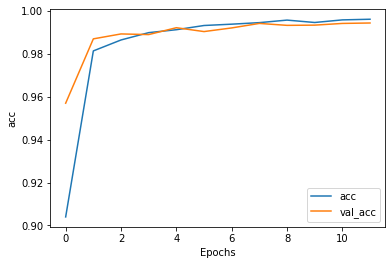

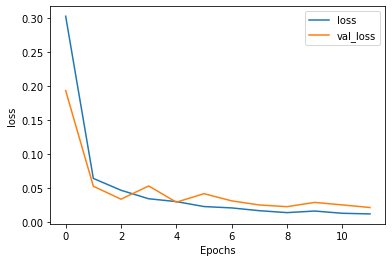

Test loss: 0.021519929788950138
Test accuracy: 0.9944


In [10]:
plot_graphs(model_run, 'acc')
plot_graphs(model_run, 'loss')


score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])